In [1]:
import os
import time
import datetime
import pytz
import glob
import re
import email

import numpy as np
import pandas as pd

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang.analysis.listserv import ListservMailList

mlist_name = "3GPP_TSG_SA_WG3_LI"
filepath = f"/home/christovis/InternetGovernance/bigbang/archives/3GPP/{mlist_name}.mbox"

mlist = ListservMailList.from_mbox(
    name=mlist_name,
    filepath=filepath,
    include_body=True,
)
mlist.period_of_activity()
len(mlist)

In [10]:
file_path = "/home/christovis/InternetGovernance/proj1/data/target_set/3GPP_TSG_SA_WG3_LI.h5"

tset = pd.read_hdf(
    file_path,
    key="df",
    header=0,
    index_col=0,
)
tset = tset.dropna()
tset['msg-date'] =  pd.to_datetime(tset['msg-date'], format="%a, %d %b %Y %H:%M:%S %z")
tset['year'] = [dt.year for dt in tset['msg-date'].values]
kts = [col for col in tset.columns if 'body-' in col]

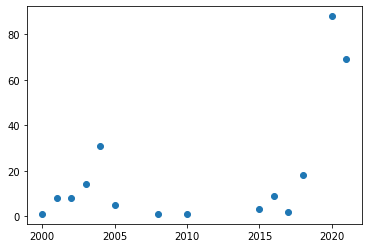

In [11]:
value, count = np.unique([dt.year for dt in tset['msg-date'].values], return_counts=True)
plt.scatter(value, count)

In [14]:
tset[kts + ['year']].groupby('year').sum()

,body- imsi,body- imsi catcher,body- n32,body- perman identifi,body- sba,body- sms intercept,body- ss7,body- stingray
year,,,,,,,,
2000,1,0,0,0,0,0,0,0
2001,18,0,0,0,0,0,0,0
2002,15,0,0,0,0,0,0,0
2003,58,0,0,0,0,0,0,0
2004,0,0,0,0,0,31,0,0
2005,6,0,0,0,0,0,0,0
2008,3,0,0,0,0,0,0,0
2010,6,0,0,0,0,0,0,0
2015,18,0,0,0,0,0,0,0
